In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

# 查看tensorflow版本
print(tf.__version__)

2.9.1


导入数据集,回归预测房价

In [31]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

数据集分割

In [33]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
# 训练集
print(x_train.shape, y_train.shape)
# 验证集
print(x_valid.shape, y_valid.shape)
# 测试集
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


对数据进行标准化

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

查看特征数目

In [35]:
x_train_scaled.shape[1:]

(8,)

In [36]:
x_train_scaled[1]

array([-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
       -0.006034  ,  1.08055484, -1.06113817])

构建神经网络层<br>
对于回归模型,最后只需要一个输出结果

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
# 查看神经网络每层的输出与输入样本数
model.summary()
# 进行汇编,采用的是均方差计算损失,梯度下降算法
model.compile(loss='mean_squared_error', optimizer='sgd')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 查看神经网络层数
model.layers

设置EarlyStopping提前终止训练条件

In [39]:
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

开始进行训练

In [40]:
history = model.fit(x_train_scaled, y_train,
                    validation_data=(x_valid_scaled, y_valid),
                    epochs=100,
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.6804 - val_loss: 0.6395
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5084 - val_loss: 0.4731

In [41]:
history.history['val_loss']

[0.6395439505577087,
 0.47308090329170227,
 0.42810291051864624,
 0.4013063609600067,
 0.3986375629901886,
 0.3885337710380554,
 0.3915185034275055,
 0.38255298137664795,
 0.39258891344070435,
 0.38215044140815735,
 0.37077653408050537,
 0.3739777207374573,
 0.3673783540725708,
 0.36363592743873596,
 0.3637818992137909,
 0.35880085825920105,
 0.35546696186065674,
 0.36024895310401917,
 0.36560699343681335,
 0.35760247707366943,
 0.3978133499622345,
 0.3586674630641937]

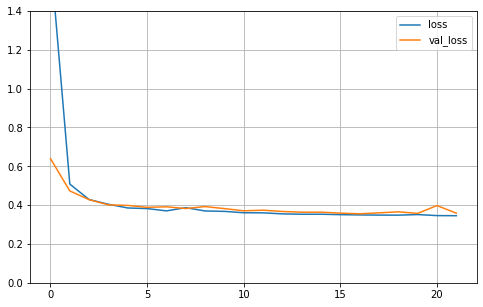

In [42]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.4)
    plt.show()
plot_learning_curves(history)

模型评估

In [43]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.36157894134521484